In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def pplot(X, y=[], l=[]):
    if len(y) == 0: y = np.ones(X.shape[0])
    plt.figure(figsize=(6,6))
    plt.xlim(-1, 1) ; plt.ylim(-1, 1)
    _ = plt.plot(X[y>0,0], X[y>0,1], 'bo')
    _ = plt.plot(X[y<0,0], X[y<0,1], 'ro')
    if len(l) > 0: plt.plot(l[0], l[1], 'g', linewidth=3)
    pass

### Generate samples of sufficient norm

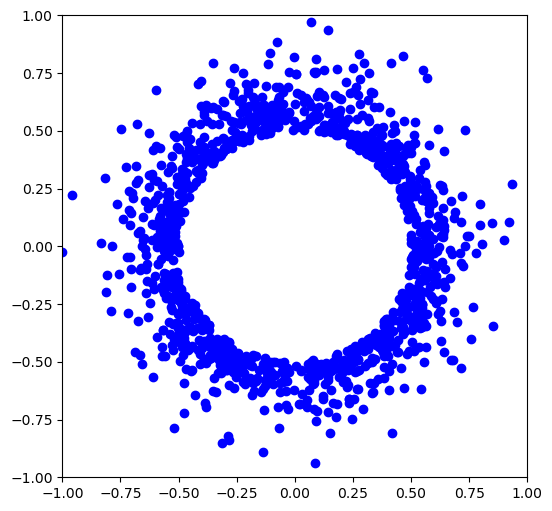

In [8]:
n = 200 ; d = 2
X = np.random.randn(50 * n, d)
nx = np.sqrt(np.sum(X * X, axis=1))
X = X / np.max(nx)
X = X[nx > np.max(nx) / 2,:]
assert X.shape[0] > n, "Increase initial lottery"
pplot(X)

### Choose a random classifier and label samples accordingly

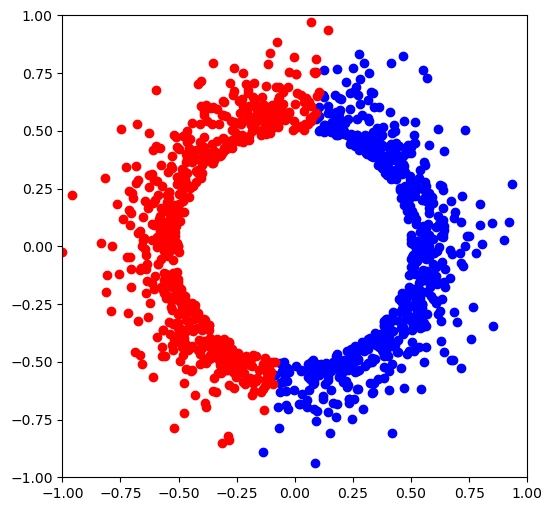

In [9]:
w = np.random.randn(2)
w = w / np.linalg.norm(w)
z = X @ w ; y = np.sign(z)
pplot(X, y)

###  Force sufficient separation of samples

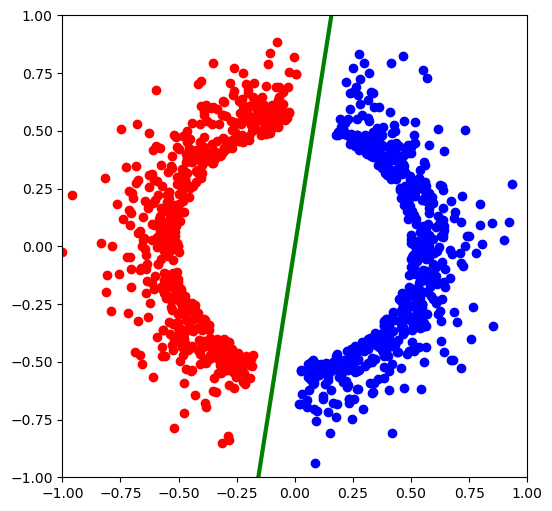

In [10]:
min_margin = 0.1
m = np.where(y * z > min_margin)
X = X[m] ; y = y[m] ; z = z[m]
xe = np.array([-1, 1])
ye = -xe * w[0] / w[1]
pplot(X, y, [xe, ye])

### Convert to probabilities using the probit model

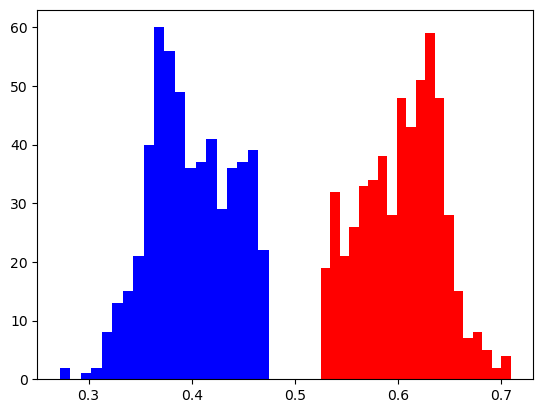

In [11]:
p = 1 / (1 + np.exp(-z))
plt.hist(p[y>0], 20, color='r') ; _ = plt.hist(p[y<0], 20, color='b')

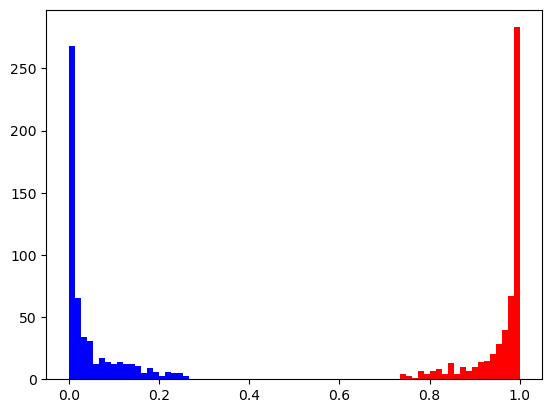

In [12]:
p = 1 / (1 + np.exp(-10 * z))
plt.hist(p[y>0], 20, color='r') ; _ = plt.hist(p[y<0], 20, color='b')

In [16]:
wrep_sampler = lambda n: np.random.choice(n, size=n, replace=True)
nrep_sampler = lambda n: np.random.choice(n, size=n, replace=False)
iter_sampler = lambda n: np.arange(n)
samplers = {'wrep':wrep_sampler, 'nrep':nrep_sampler, 'iter':iter_sampler}
def set_sampler(mode):
    assert samplers.get(mode), "Sampling scheme not defined: " + mode
    return samplers[mode]

In [20]:
def perceptron(X, y, t=10, mode='nrep'):
    sampler = set_sampler(mode)
    w, e = np.zeros(X.shape[1]), []
    for epoch in range(t):
        for i in iter(sampler(n)):
            if y[i] * np.dot(X[i], w) <= 0:
                w = w + y[i] * X[i]
        e.append(np.mean(y * (X @ w) <= 0))
        print("%3d : %5.2f" % (epoch+1, e[-1] * 100))
        if e[-1] == 0: break
j    return w, e

In [36]:
print('\nPerceptron with replacement:\n' + 28*'-')
w1, e1 = perceptron(X, y, mode='wrep')
print('\nPerceptron without replacement:\n' + 32*'-')
w2, e2 = perceptron(X, y, mode='nrep')
print('\nPerceptron sequential iterator:\n' + 32*'-')
w3, e3 = perceptron(X, y, mode='iter')


Perceptron with replacement:
----------------------------
  1 :  0.00

Perceptron without replacement:
--------------------------------
  1 :  0.00

Perceptron sequential iterator:
--------------------------------
  1 :  0.00
